In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.3.0
2.4.0


In [4]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [18]:
from keras.datasets import cifar10

In [19]:
# the data is shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [20]:
X_train.shape

(50000, 32, 32, 3)

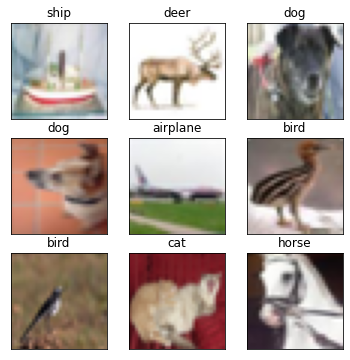

In [21]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])

# data processing 
## normalization and one hot encoding

In [12]:
X_train=X_train/255
X_test=X_test/255

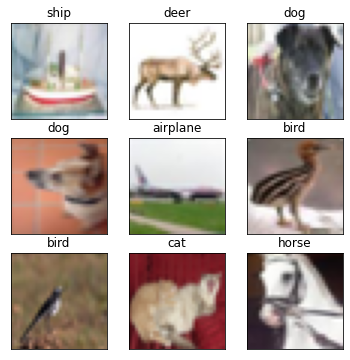

In [22]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])

In [23]:
X_train=X_train.reshape(50000,3072)
X_test=X_test.reshape(10000,3072)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [24]:
X_train.shape

(50000, 3072)

In [25]:
#one hot encoding 
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train.shape

(50000, 10)

# Neural Network -1

In [26]:
model=None
model=Sequential()
#hidden layer 1>>FC -512
model.add(Dense(512,input_dim=3072,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# hidden layer 2 >> FC - 128
model.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# output layer >> FC 10
model.add(Dense(10,activation='softmax'))

model.summary()

#compile the model 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,batch_size=32,epochs=10)

# evaluation of the model
prediction=model.evaluate(X_test,y_test,verbose=0)
print(prediction)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

### accuracy of 1st neural network having 2 hidden layers is 43.20%

# Neural network -2

In [27]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [28]:
X_train.shape

(50000, 32, 32, 3)

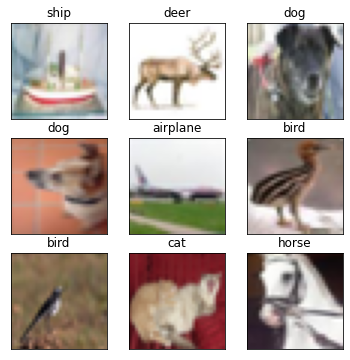

In [29]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(6, 6))
np.random.seed(0)
idx = np.random.randint(0, 50000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1, xticks=[], yticks=[])
    index = y_train[idx[i]]
    plt.title(class_names[index[0]])
    plt.imshow(X_train[idx[i]])

In [30]:
#one hot encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [31]:
model2=None
model2=Sequential()

#conv3-32

model2.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3), activation='relu', kernel_initializer='he_normal'))

#conv3-64

model2.add(Conv2D(64,kernel_size=(3,3),activation='relu',kernel_initializer='he_normal'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
#ann 
#FC-512 1st hidden layer
model2.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

#FC-128 2nd hidden layer
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Dropout(0.25))

#FC-10 output layer
model2.add(Dense(10,activation='softmax'))

#compilation
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# fitiing the model
model2.fit(X_train,y_train,batch_size=100,epochs=50)
# evaluation of the model
prediction=model2.evaluate(X_test,y_test,verbose=0)
print(prediction)


Epoch 1/50
500/500 [==============================] - 4s 9ms/step - loss: 1.5335 - accuracy: 0.4687
Epoch 2/50
500/500 [==============================] - 4s 9ms/step - loss: 1.0933 - accuracy: 0.6150
Epoch 3/50
500/500 [==============================] - 4s 9ms/step - loss: 0.9528 - accuracy: 0.6648
Epoch 4/50
500/500 [==============================] - 4s 9ms/step - loss: 0.9253 - accuracy: 0.6738
Epoch 5/50
500/500 [==============================] - 4s 9ms/step - loss: 0.8015 - accuracy: 0.7189
Epoch 6/50
500/500 [==============================] - 4s 9ms/step - loss: 0.6634 - accuracy: 0.7674
Epoch 7/50
500/500 [==============================] - 4s 9ms/step - loss: 0.5571 - accuracy: 0.8039
Epoch 8/50
500/500 [==============================] - 4s 9ms/step - loss: 0.4716 - accuracy: 0.8320
Epoch 9/50
500/500 [==============================] - 4s 9ms/step - loss: 0.4100 - accuracy: 0.8554
Epoch 10/50
500/500 [==============================] - 4s 9ms/step - loss: 0.3595 - accuracy: 0.8740

### conclusion---> neural network -2 accuracy is 98.47% containing ANN and CNN much increased from the previous ANN only

# NEURAL NETWORK -3


In [33]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [34]:
X_train.shape

(50000, 32, 32, 3)

In [35]:
#one hot encoding
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [38]:
model3=None
model3=Sequential()

#conv3-32

model3.add(Conv2D(32, kernel_size=(3, 3), padding='valid', input_shape=(32, 32, 3), activation='relu', kernel_initializer='he_normal'))
model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

#conv3-64
model3.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', kernel_initializer='he_normal'))
model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_normal'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

#flattening the model before providing to ANN
model3.add(Flatten())
#FC-512 1st hidden layer
model3.add(Dense(512,activation='relu',kernel_initializer='he_normal'))
model3.add(BatchNormalization())
model3.add(Dropout(0.25))

#FC-10 output layer
model3.add(Dense(10,activation='softmax'))

#compilation
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# fitiing the model
model3.fit(X_train,y_train,batch_size=100,epochs=50)
# evaluation of the model
prediction=model3.evaluate(X_test,y_test,verbose=0)
print(prediction)

Epoch 1/50
500/500 [==============================] - 4s 7ms/step - loss: 1.7391 - accuracy: 0.3835
Epoch 2/50
500/500 [==============================] - 4s 7ms/step - loss: 1.3409 - accuracy: 0.5216
Epoch 3/50
500/500 [==============================] - 4s 7ms/step - loss: 1.3642 - accuracy: 0.5114
Epoch 4/50
500/500 [==============================] - 4s 7ms/step - loss: 1.1162 - accuracy: 0.6058
Epoch 5/50
500/500 [==============================] - 4s 7ms/step - loss: 0.9820 - accuracy: 0.6552
Epoch 6/50
500/500 [==============================] - 4s 7ms/step - loss: 0.9372 - accuracy: 0.6713
Epoch 7/50
500/500 [==============================] - 4s 7ms/step - loss: 0.9398 - accuracy: 0.6721
Epoch 8/50
500/500 [==============================] - 4s 7ms/step - loss: 0.8033 - accuracy: 0.7186
Epoch 9/50
500/500 [==============================] - 4s 7ms/step - loss: 0.7307 - accuracy: 0.7422
Epoch 10/50
500/500 [==============================] - 4s 7ms/step - loss: 0.6807 - accuracy: 0.7589

### CONCLUSION---> NEURAL NETWORK-3 HAVING ACCURACY OF THE MODEL IS 92.22%